In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="whitegrid", palette="colorblind") # https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme
df_p1 = pd.read_csv("./prob1-combined.csv") # cvs com headers: n, mean, ...

In [2]:
df_p1['n_nlogn_10'] = df_p1['n'] * np.log10(df_p1['n'])
df_p1['n_nlogn_2'] = df_p1['n'] * np.log2(df_p1['n'])

In [6]:
df_p1

,n,command,mean,stddev,median,user,system,min,max,n_nlogn_10,n_nlogn_2


In [4]:
from scipy import stats
r_value_n = stats.linregress(df_p1['n'], df_p1['mean'])[2]
r_value_nlogn_2 = stats.linregress(df_p1['n_nlogn_2'], df_p1['mean'])[2]
r_value_nlogn_10 = stats.linregress(df_p1['n_nlogn_10'], df_p1['mean'])[2]

r_value_n**2, r_value_nlogn_2**2, r_value_nlogn_10**2

# se r_value_n**2 < r_value_nlogn**, então é NlogN

(0.9995445813533165, 0.9997239303735581, 0.9997239303735581)

/tmp/ipykernel_86514/2470553738.py:6: RuntimeWarning: divide by zero encountered in log10
  ax.set_xscale("function", functions=(lambda x: x * np.log10(x), lambda x: x))
/tmp/ipykernel_86514/2470553738.py:6: RuntimeWarning: invalid value encountered in multiply
  ax.set_xscale("function", functions=(lambda x: x * np.log10(x), lambda x: x))


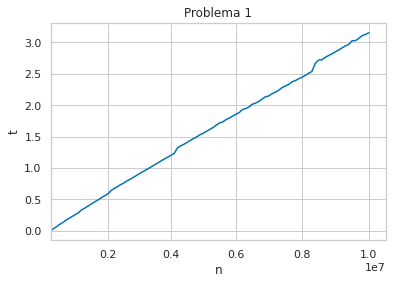

In [26]:
#plt.figure(figsize=(20, 8))
ax = sns.lineplot(x="n", y="mean", data=df_p1, err_style="bars", ci="sd")
ax.set_xlim(left=10)
ax.set_xlabel("n")
ax.set_ylabel("t")
ax.set_xscale("function", functions=(lambda x: x * np.log10(x), lambda x: x))
plt.title("Problema 1")
plt.savefig("./prob1_graph.png")

In [8]:
df_p2 = pd.read_csv("./prob2-1641905231.csv") # csv with headers: n1, n2, mean
df_p2['nm'] = df_p2['n'] ** 2 # * df_p2['n2']

In [9]:
df_p2

,n,command,mean,stddev,median,user,system,min,max,nm
0,10,../project < in.txt,0.004004,0.002052,0.003710,0.002973,0.001260,0.000991,0.009748,100
1,11,../project < in.txt,0.002346,0.001947,0.001638,0.001995,0.000711,0.000979,0.012503,121
2,12,../project < in.txt,0.004433,0.003462,0.002450,0.003252,0.001485,0.000862,0.012618,144
3,13,../project < in.txt,0.004118,0.002635,0.003080,0.003029,0.001354,0.000885,0.009643,169
4,14,../project < in.txt,0.003822,0.002634,0.003099,0.002976,0.001159,0.000907,0.012232,196
...,...,...,...,...,...,...,...,...,...,...
355,95000,../project < in.txt,4.994726,0.008012,4.994076,4.989308,0.003759,4.984775,5.003948,9025000000
356,96000,../project < in.txt,5.083058,0.010851,5.075759,5.076103,0.005214,5.073759,5.100038,9216000000
357,97000,../project < in.txt,5.205870,0.007585,5.204031,5.197088,0.007009,5.200338,5.227046,9409000000
358,98000,../project < in.txt,5.320740,0.023128,5.308136,5.316477,0.002544,5.304561,5.358064,9604000000


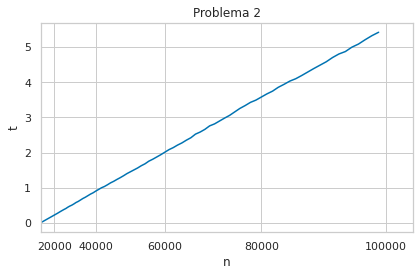

In [31]:
#plt.figure(figsize=(20, 8))
ax = sns.lineplot(x="n", y="mean", data=df_p2, err_style="bars", ci="sd")
ax.set_xlim(left=10)
ax.set_xlabel("n")
ax.set_ylabel("t")
ax.set_xscale("function", functions=(lambda x: x ** 2, lambda x: x ** (1/2)))
plt.title("Problema 2")
plt.tight_layout()
plt.savefig("./prob2_graph.png")